In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
discount_data = pd.read_csv("discount_campaign.csv")

In [3]:
print(discount_data.info())
print(discount_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   discount_applied    500 non-null    object 
 2   order_count_before  500 non-null    int64  
 3   order_count_after   500 non-null    int64  
 4   total_spend_before  500 non-null    float64
 5   total_spend_after   500 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 23.6+ KB
None
   customer_id discount_applied  order_count_before  order_count_after  \
0         1286               No                   4                 11   
1         1563              Yes                  10                  2   
2         1289               No                   2                  8   
3         1053               No                   4                  3   
4         1516              Yes                  19               

In [11]:
discount_data["order_change_pct"] = ((discount_data["order_count_after"] - discount_data["order_count_before"]) / discount_data["order_count_before"]) * 100
discount_data["spend_change_pct"] = ((discount_data["total_spend_after"] - discount_data["total_spend_before"]) / discount_data["total_spend_before"]) * 100
discount_data["order_change_pct"]
discount_data["spend_change_pct"]

0      107.443240
1      -58.011912
2      175.236066
3      -80.595578
4       80.082452
          ...    
495    -73.980479
496    157.333196
497     19.531893
498     93.291220
499     96.478665
Name: spend_change_pct, Length: 500, dtype: float64

In [5]:
conditions = [
    (discount_data["spend_change_pct"] > 30),  # High responders
    (discount_data["spend_change_pct"] > 10),  # Moderate responders
    (discount_data["spend_change_pct"] <= 10)  # Low responders
]
categories = ["High", "Moderate", "Low"]
discount_data["response_segment"] = np.select(conditions, categories, default="Low")


### Task 1. Compare customer spending behavior before and after discounts.

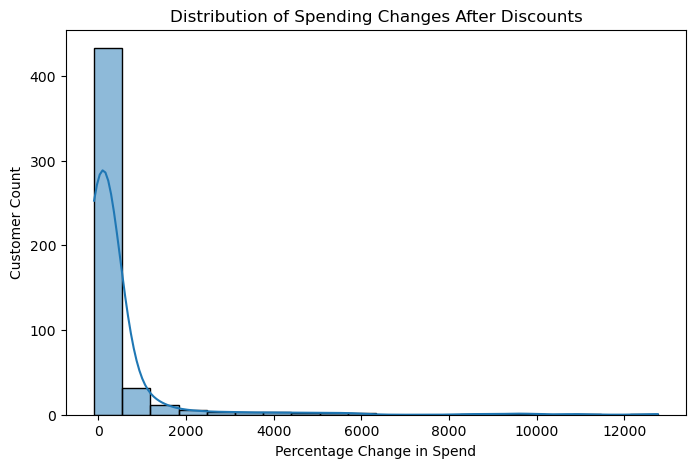

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(discount_data["spend_change_pct"], bins=20, kde=True)
plt.xlabel("Percentage Change in Spend")
plt.ylabel("Customer Count")
plt.title("Distribution of Spending Changes After Discounts")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_13400\2803037526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="response_segment", data=discount_data, palette="viridis")


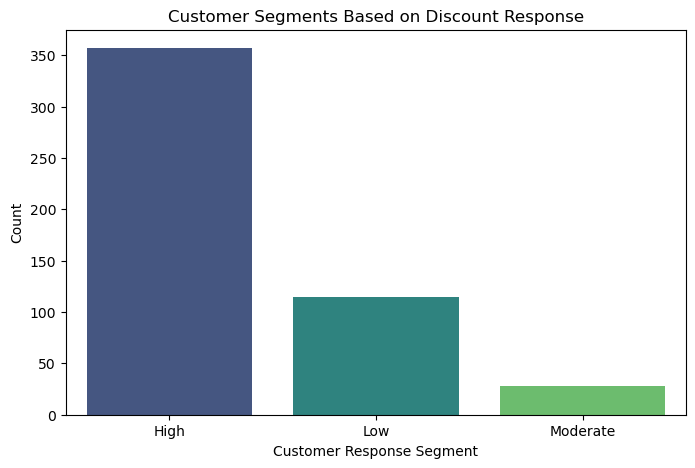

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x="response_segment", data=discount_data, palette="viridis")
plt.xlabel("Customer Response Segment")
plt.ylabel("Count")
plt.title("Customer Segments Based on Discount Response")
plt.show()

### Task 2. Identify customer segments most responsive to discounts.

In [8]:
summary = discount_data.groupby("response_segment")[["order_change_pct", "spend_change_pct"]].mean()
print(summary)

                  order_change_pct  spend_change_pct
response_segment                                    
High                    196.856113        597.690017
Low                     168.097166        -45.711400
Moderate                330.917172         19.600981


### Task 3. Recommend a strategy to maximize revenue while maintaining profitability.

In [9]:

if summary.loc["High"]["spend_change_pct"] > 50:
    print("Discounts are highly effective. Consider targeting high responders with loyalty programs.")
elif summary.loc["Moderate"]["spend_change_pct"] > 20:
    print("Moderate impact. Consider refining discount strategies to optimize profitability.")
else:
    print("Low impact. Discounts may not be the best strategy for revenue growth.")

Discounts are highly effective. Consider targeting high responders with loyalty programs.
